# Trabalho Prático I

Universidade Federal do Ceará

Introdução à Ciência de Dados - 2023.2

Docente: José Macedo

Discentes:
- **Elvin Matheus Sousa da Silva**
- **Madalena Osório Leite**

## Especificações

Divididos em equipes, cada grupo deve escolher um problema do mundo real a ser resolvido por inteligência artificial. Exemplo: Prever o congestionamento do tráfego em determinada avenida da capital no horário do rush.. Para isso, as equipes deverão montar um conjunto de dados, coletando, por meio de web scraping, dados de uma ou mais plataformas na internet. Cada equipe:
 - Deve observar os dados coletados, identificando dados faltantes, decidindo sobre como resolver o problema e o efeito da solução na qualidade dos dados;
 - Realizar as devidas transformações em dados do tipo categóricos para que estes sejam aceitos pelos algoritmos da biblioteca scikit-learning;
 - Mudar a escala das features coletadas para permitir comparações entre as variáveis independentes;
 - Exibir, por meio de gráficos, informações estatísticas simples como média, mediana e desvio padrão, buscando tirar conclusões a partir dessas métricas (tente usar um boxplot para comparar as features);
 - Utilizar técnicas de seleção de características a fim de gerar várias versões dos dados.


## Importações

Importação das bibliotecas necessárias para fazer importação de dados da web, análise de dados e manipulação de dados no Python.

A biblioteca requests é utilizada para fazer solicitações HTTP para obter conteúdo de páginas da web.

A biblioteca Beautiful Soup é usada para analisar e extrair informações de páginas da web.

A biblioteca pandas é muito útil para trabalhar com dados estruturados, para a criação de DataFrames para armazenar e manipular dados tabulares, realizar análises e visualizações de dados.

O módulo pyplot da biblioteca matplotlib é usado para criar gráficos e visualizações em Python. Ele fornece funções e métodos para criar gráficos de linha, de barra, de dispersão e histogramas.

A biblioteca seaborn é construída sobre o matplotlib e tem como objetivo tornar a criação de gráficos mais simples e esteticamente agradáveis.

O SimpleImputer faz parte da biblioteca scikit-learn e é usado para tratar valores ausentes em conjuntos de dados. Ele permite preencher os valores ausentes com uma constante, a média, a mediana ou qualquer outro valor desejado, ajudando a garantir que os dados estejam prontos para análise ou modelagem.

O OneHotEncoder também faz parte da biblioteca scikit-learn e é usado para lidar com variáveis categóricas em conjuntos de dados. Ele converte essas variáveis em representações numéricas, permitindo que algoritmos de aprendizado de máquina utilizem esses dados de forma eficaz.

O StandardScaler é usado para padronizar as features (variáveis) de um conjunto de dados. Isso significa transformar as features de modo que elas tenham média zero e desvio padrão igual a um, o que é importante para muitos algoritmos de aprendizado de máquina, especialmente aqueles que são sensíveis à escala dos dados.

A função Markdown do módulo IPython.display é usada para exibir texto formatado em Markdown diretamente no ambiente do Jupyter Notebook ou Google Colab. Isso facilita a apresentação de documentação, explicações e notas formatadas de maneira clara e legível.







In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from IPython.display import Markdown

## Coleta de Dados

Os dados foram coletados a partir da página do [Lopes Imóveis](https://www.lopes.com.br/busca/venda/br/ce/fortaleza). A fonte é uma plataforma online que lista imóveis à venda na cidade de Fortaleza.

O objetivo da coleta de dados foi reunir informações sobre imóveis localizados na cidade de Fortaleza. O foco principal foi em apartamentos disponíveis para venda.

O objetivo deste projeto é determinar se os valores dos imóveis em Fortaleza são coerentes com as características dos imóveis. Além disso, deseja-se identificar tendências e padrões nos preços dos imóveis na região.

Os dados coletados incluem informações sobre imóveis, como preço, localização, número de quartos, número de banheiros, área do imóvel, entre outros detalhes relevantes.

Os dados foram salvos "como estão" da fonte, sem nenhum tratamento ou limpeza inicial. O objetivo é realizar a limpeza e a preparação dos dados posteriormente no processo de análise.

In [19]:
# Cria um DataFrame vazio para armazenar os dados dos imóveis
df_imoveis = pd.DataFrame()

# Itera de 1 a 20 para acessar as 20 páginas de anúncios
for n in range(1, 21):

    # Constrói a URL com base no número da página
    url = f'https://www.lopes.com.br/busca/venda/br/ce/fortaleza/pagina/{n}'

    # Faz uma requisição HTTP para obter o conteúdo da página
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")

    # Cria uma lista para armazenar os dados dos anúncios em cada página
    anuncios = []

    # Encontra todos os elementos 'li' com a classe 'cardlist__item' que representam os anúncios
    ads = soup.find_all('li', class_='cardlist__item ng-star-inserted')

    for ad in ads:
        # Dicionário para armazenar informações de cada anúncio
        anuncio = {
            'tipo': None,
            'valor_imovel': None,
            'valor_condominio': None,
            'rua': None,
            'bairro': None,
            'area': None,
            'quartos': None,
            'banheiros': None,
            'vagas_garagem': None,
            'link': None,
        }

        # Encontra o valor do imóvel no anúncio
        valor = ad.find('h4', class_='card__price')

        # Verifica se o valor é None, indicando um anúncio "fake", e passa para o próximo anúncio
        if valor == None:
            continue

        anuncio['valor_imovel'] = valor.text

        # Encontra o tipo do imóvel no anúncio
        tipo = ad.find('p', class_='card__type')
        anuncio['tipo'] = tipo.text

        # Encontra o valor do condomínio no anúncio
        condominio = ad.find('h5', class_='card__subprice ng-star-inserted')
        if len(condominio.text) > 0:
          anuncio['valor_condominio'] = condominio.text

        # Encontra a descrição da rua do imóvel no anúncio
        rua = ad.find('p', class_='card__location')
        anuncio['rua'] = rua.text

        # Encontra a descrição do bairro do imóvel no anúncio
        bairro = rua.find_next('p', class_='card__location')
        anuncio['bairro'] = bairro.text

        # Encontra informações adicionais sobre o imóvel (área, quartos, banheiros, vagas de garagem)
        extra = ad.find_all('li', class_='attributes__icon-wrapper ng-star-inserted')
        for icon in extra:
            ruler = icon.find('lps-icon-ruler')
            if ruler != None:
                area = icon.find('div', class_='')
                anuncio['area'] = area.text

            bed = icon.find('lps-icon-bed')
            if bed != None:
                quartos = icon.find('div', class_='')
                anuncio['quartos'] = quartos.text

            sink = icon.find('lps-icon-sink')
            if sink != None:
                sink = icon.find('div', class_='')
                anuncio['banheiros'] = sink.text

            car = icon.find('lps-icon-car')
            if car != None:
                garagem = icon.find('div', class_='')
                anuncio['vagas_garagem'] = garagem.text


        link = ad.find('a').get('href')
        anuncio['link'] = 'https://www.lopes.com.br' + link

        # Adiciona o dicionário de informações do anúncio à lista de anúncios
        anuncios.append(anuncio)

    # Cria um DataFrame auxiliar com os anúncios da página atual
    df_aux = pd.DataFrame(anuncios)

    # Concatena o DataFrame auxiliar ao DataFrame principal
    df_imoveis = pd.concat([df_imoveis, df_aux], ignore_index=True)

## Limpeza dos dados
Durante a etapa de limpeza de dados foram realizados procedimentos para tratar colunas, tais como valores que estavam como objero e com unidades.

Um exemplo notável de tratamento ocorreu na coluna "Valor do Imóvel". Esta coluna continha valores representados como strings, incluindo símbolos monetários e separadores de milhares, como R$190.000 Inicialmente, os caracteres indesejados, tais como o símbolo de moeda, pontos de milhar e espaços em branco, foram removidos das strings. Após a remoção dos caracteres indesejados, as strings resultantes foram convertidas em valores inteiros, tornando-as apropriadas para análises numéricas. Essas ações garantiram que os dados na coluna "Valor do Imóvel" estivessem em um formato limpo e adequado para análises posteriores.

Ações similares a esta foram realizadas em todas as variáveis que apresentavam alguma informação desnecessária na sua forma inicial.

In [20]:
# Apresenta informações básicas formatadas em Markdown e informações do DataFrame
display(Markdown('### Informações sobre o dataset'))
display(df_imoveis.info())
display(Markdown('### Linhas do dataset'))
display(df_imoveis.head())

### Informações sobre o dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tipo              460 non-null    object
 1   valor_imovel      460 non-null    object
 2   valor_condominio  344 non-null    object
 3   rua               460 non-null    object
 4   bairro            460 non-null    object
 5   area              460 non-null    object
 6   quartos           405 non-null    object
 7   banheiros         431 non-null    object
 8   vagas_garagem     414 non-null    object
 9   link              460 non-null    object
dtypes: object(10)
memory usage: 36.1+ KB


None

### Linhas do dataset

,tipo,valor_imovel,valor_condominio,rua,bairro,area,quartos,banheiros,vagas_garagem,link
0,Apartamento,R$ 3.050.000,Condomínio R$ 2.300/mês,Rua José Vilar,"Meireles, Fortaleza",235m²,3,4,4,https://www.lopes.com.br/imovel/REO571567/vend...
1,Apartamento,R$ 1.697.000,Condomínio R$ 1.500/mês,Rua Monsenhor Bruno,"Meireles, Fortaleza",183m²,3,5,4,https://www.lopes.com.br/imovel/REO606126/vend...
2,Apartamento,R$ 550.000,Condomínio R$ 1.191/mês,Avenida Desembargador Moreira,"Aldeota, Fortaleza",134m²,3,4,2,https://www.lopes.com.br/imovel/REO565444/vend...
3,Apartamento,R$ 1.350.000,Condomínio R$ 1.050/mês,Rua Doutor José Lourenço,"Meireles, Fortaleza",120m²,3,4,3,https://www.lopes.com.br/imovel/REO448990/vend...
4,Apartamento,R$ 980.000,Condomínio R$ 873/mês,Rua Joaquim Nabuco,"Meireles, Fortaleza",74m²,2,2,2,https://www.lopes.com.br/imovel/REO658042/vend...


### Deleção das linhas indesejadas
Foram excluidas as linhas indesejadas do DataFrame para simplificar e refinar o conjunto de dados, eliminando informações não necessárias.

In [21]:
# Apresenta informações básicas formatadas em Markdown e informações do DataFrame
display(Markdown('### Visão dos elementos da coluna "tipo" antes da deleção das linhas indesejadas'))
display(df_imoveis['tipo'].unique())

# Identifica as linhas do DataFrame df_imoveis em que a coluna 'tipo' não corresponde a 'Apartamento', 'Cobertura', 'Triplex' ou 'Duplex'. As linhas a serem excluídas são obtidas como um índice
linhas_excluir = df_imoveis[(df_imoveis['tipo'] != 'Apartamento') & (df_imoveis['tipo'] != 'Cobertura') & (df_imoveis['tipo'] != 'Triplex') & (df_imoveis['tipo'] != 'Duplex')].index
# Exclui as linhas identificadas anteriormente do DataFrame df_imoveis, removendo assim as entradas que não atendem aos critérios especificados
df_imoveis = df_imoveis.drop(linhas_excluir)
# Redefine o índice do DataFrame após a exclusão das linhas
df_imoveis = df_imoveis.reset_index(drop=True)

# Apresenta informações básicas formatadas em Markdown e informações do DataFrame
display(Markdown('### Visão dos elementos da coluna "tipo" após deleção das linhas indesejadas'))
display(df_imoveis['tipo'].unique())

### Visão dos elementos da coluna "tipo" antes da deleção das linhas indesejadas

array(['Apartamento', 'Cobertura', 'Flat', 'Casa', 'Condomínio', 'Salas',
       'Triplex', 'Loja', 'Sobrado', 'Terreno', 'Prédio inteiro',
       'Galpão', 'Duplex', 'Mall', 'Loteamento', 'Área de Terra'],
      dtype=object)

### Visão dos elementos da coluna "tipo" após deleção das linhas indesejadas

array(['Apartamento', 'Cobertura', 'Triplex', 'Duplex'], dtype=object)

### Tratamento da coluna "valor_imovel"
Essas operações transformam as linhas da coluna "valor_imovel" de formato de string (por exemplo, "R$ 1.000.000,00") em valores numéricos (por exemplo, 1000000.0), facilitando a análise e a manipulação de dados financeiros.

In [22]:
# Apresenta informações básicas formatadas em Markdown e informações do DataFrame
display(Markdown('#### Visão geral da coluna "valor_imovel" antes do tratamento'))
display(df_imoveis.valor_imovel)

# Remove o texto "R$ " e o caractere de espaço (nbsp) da coluna 'valor_imovel' e substitui por uma string vazia
df_imoveis['valor_imovel'] = df_imoveis['valor_imovel']\
                                    .str.replace("R$", "", regex=False)\
                                    .str.replace("\xa0", "")\
                                    .str.replace(" ", "")\
                                    .str.replace(".", "", regex=False)

# Converte coluna para tipo 'int64'
df_imoveis['valor_imovel'] = df_imoveis['valor_imovel'].astype('float64')

# Apresenta informações básicas formatadas em Markdown e informações do DataFrame
display(Markdown('#### Visão geral da coluna "valor_imovel" após tratamento'))
display(df_imoveis['valor_imovel'])

#### Visão geral da coluna "valor_imovel" antes do tratamento

0       R$ 3.050.000 
1       R$ 1.697.000 
2         R$ 550.000 
3       R$ 1.350.000 
4         R$ 980.000 
            ...      
289       R$ 700.000 
290       R$ 800.000 
291     R$ 1.450.000 
292       R$ 280.000 
293       R$ 580.000 
Name: valor_imovel, Length: 294, dtype: object

#### Visão geral da coluna "valor_imovel" após tratamento

0      3050000.0
1      1697000.0
2       550000.0
3      1350000.0
4       980000.0
         ...    
289     700000.0
290     800000.0
291    1450000.0
292     280000.0
293     580000.0
Name: valor_imovel, Length: 294, dtype: float64

### Tratamento da coluna "valor_condominio"
Essas operações transformam as linhas da coluna "valor_condomínio" de formato de string com algumas informações desnecessárias em em valores numéricos, facilitando a análise e a manipulação de dados financeiros.

In [23]:
# Apresenta informações básicas formatadas em Markdown e informações do DataFrame
display(Markdown('#### Visão geral da coluna "valor_condominio" antes do tratamento'))
display(df_imoveis['valor_condominio'])

# Seleciona a coluna "valor_condominio" do DataFrame df_imoveis
# Remove as palavras "Condomínio", o símbolo "R$" (se presente) da coluna, os espaços não quebrados (caracteres de espaço especiais) da coluna, a string "/mês" e os pontos de milhares (se presentes)
df_imoveis['valor_condominio'] = df_imoveis['valor_condominio'].str.replace("Condomínio ", "")\
                                            .str.replace("R$", "", regex=False)\
                                            .str.replace("\xa0", "")\
                                            .str.replace("/mês", "")\
                                            .str.replace(".", "", regex=False)

# Converte os valores na coluna "valor_condomínio" do DataFrame df_imoveis em números de ponto flutuante (float)
df_imoveis['valor_condominio'] = pd.to_numeric(df_imoveis['valor_condominio'])

display(Markdown('#### Visão geral da coluna "valor_condominio" após tratamento'))
display(df_imoveis['valor_condominio'])

#### Visão geral da coluna "valor_condominio" antes do tratamento

0      Condomínio R$ 2.300/mês
1      Condomínio R$ 1.500/mês
2      Condomínio R$ 1.191/mês
3      Condomínio R$ 1.050/mês
4        Condomínio R$ 873/mês
                ...           
289    Condomínio R$ 2.195/mês
290    Condomínio R$ 1.400/mês
291    Condomínio R$ 2.300/mês
292      Condomínio R$ 300/mês
293      Condomínio R$ 660/mês
Name: valor_condominio, Length: 294, dtype: object

#### Visão geral da coluna "valor_condominio" após tratamento

0      2300.0
1      1500.0
2      1191.0
3      1050.0
4       873.0
        ...  
289    2195.0
290    1400.0
291    2300.0
292     300.0
293     660.0
Name: valor_condominio, Length: 294, dtype: float64

### Tratamento das demais colunas
Essas operações transformam a linha da coluna "bairro, cidade" em duas colunas com "bairro" e "cidade". Na coluna "area" foi retirado o texto m².

In [24]:
# Apresenta informações básicas formatadas em Markdown e informações do DataFrame para antes do tratamento
display(Markdown('#### Visão geral das colunas "bairro" e "area" antes do tratamento'))
display(df_imoveis[['bairro', 'area']])

# Divide os valores na coluna "bairro" com base em uma vírgula seguida por um espaço ", "
df_imoveis[['bairro', 'cidade']] = df_imoveis['bairro'].str.split(", ", expand=True)

# Substitui o texto "m²" (metros quadrados) por uma string vazia, removendo-o da coluna
df_imoveis['area'] = df_imoveis['area'].str.replace("m²", "").str.replace(" ", "")
df_imoveis['area'] = pd.to_numeric(df_imoveis['area'])

# Apresenta informações básicas formatadas em Markdown e informações do DataFrame para depois do tratamento
display(Markdown('#### Visão geral das colunas "bairro" e "area" após tratamento'))
display(df_imoveis[['bairro', 'cidade', 'area']])

#### Visão geral das colunas "bairro" e "area" antes do tratamento

,bairro,area
0,"Meireles, Fortaleza",235m²
1,"Meireles, Fortaleza",183m²
2,"Aldeota, Fortaleza",134m²
3,"Meireles, Fortaleza",120m²
4,"Meireles, Fortaleza",74m²
...,...,...
289,"Meireles, Fortaleza",143m²
290,"Meireles, Fortaleza",193m²
291,"Mucuripe, Fortaleza",272m²
292,"Parreão, Fortaleza",52m²


#### Visão geral das colunas "bairro" e "area" após tratamento

,bairro,cidade,area
0,Meireles,Fortaleza,235
1,Meireles,Fortaleza,183
2,Aldeota,Fortaleza,134
3,Meireles,Fortaleza,120
4,Meireles,Fortaleza,74
...,...,...,...
289,Meireles,Fortaleza,143
290,Meireles,Fortaleza,193
291,Mucuripe,Fortaleza,272
292,Parreão,Fortaleza,52


### Tratamento dos valores ausentes
Para as variáveis "valor_condominio", "quartos", "banheiros" e "vagas_garagem" com valores faltantes, foi criada uma instância do SimpleImputer com a estratégia de preenchimento como 'mediana'. Após o ajuste com o SimpleImputer aos dados na coluna da variável do DataFrame foi realizado o preenchimento dos valores ausentes na coluna com a valor da mediana.


In [25]:
display(df_imoveis[df_imoveis.isna().any(axis=1)])

,tipo,valor_imovel,valor_condominio,rua,bairro,area,quartos,banheiros,vagas_garagem,link,cidade
46,Apartamento,5350000.0,NaN,Rua Osvaldo Cruz,Aldeota,311,4,6,5,https://www.lopes.com.br/imovel/REO606481/vend...,Fortaleza
85,Apartamento,1180000.0,NaN,Rua Silva Jatahy,Meireles,57,2,2,1,https://www.lopes.com.br/imovel/REO648015/vend...,Fortaleza
96,Apartamento,2490000.0,NaN,Rua Gontran Giffoni,Engenheiro Luciano Cavalcante,292,4,5,4,https://www.lopes.com.br/imovel/REO448774/vend...,Fortaleza
98,Apartamento,2400000.0,NaN,Rua Andrade Furtado,Cocó,220,3,5,4,https://www.lopes.com.br/imovel/REO742578/vend...,Fortaleza
131,Apartamento,630000.0,NaN,Rua Caio Cid,Engenheiro Luciano Cavalcante,60,2,2,1,https://www.lopes.com.br/imovel/REO891567/vend...,Fortaleza
164,Apartamento,630000.0,NaN,Rua Caio Cid,Engenheiro Luciano Cavalcante,60,2,2,1,https://www.lopes.com.br/imovel/REO891567/vend...,Fortaleza
171,Apartamento,480000.0,NaN,Rua Tenente Benévolo,Meireles,39,1,1,None,https://www.lopes.com.br/imovel/REO832557/vend...,Fortaleza
198,Apartamento,420000.0,NaN,Rua Vicente Leite,Aldeota,37,1,1,1,https://www.lopes.com.br/imovel/REO746326/vend...,Fortaleza
211,Apartamento,820000.0,NaN,Rua Tenente Benévolo,Meireles,65,2,1,None,https://www.lopes.com.br/imovel/REO765935/vend...,Fortaleza
235,Apartamento,362000.0,NaN,Rua Tenente Benévolo,Meireles,26,1,1,1,https://www.lopes.com.br/imovel/REO766340/vend...,Fortaleza


In [26]:
# Cria uma instância do SimpleImputer com a estratégia de preenchimento como 'mediana'
simple_imputer = SimpleImputer(strategy='median')

# Ajusta o SimpleImputer aos dados na coluna 'valor_condominio' do DataFrame
simple_imputer.fit(df_imoveis[['valor_condominio']])

# Realiza o preenchimento dos valores ausentes na coluna 'valor_condominio' com a mediana
df_imoveis[['valor_condominio']] = simple_imputer.transform(df_imoveis[['valor_condominio']])

# Realiza o preenchimento dos valores ausentes na coluna 'quartos' com a mediana
simple_imputer = SimpleImputer(strategy='median')
simple_imputer.fit(df_imoveis[['quartos']])
df_imoveis[['quartos']] = simple_imputer.transform(df_imoveis[['quartos']])

# Realiza o preenchimento dos valores ausentes na coluna 'banheiros' com a mediana
simple_imputer = SimpleImputer(strategy='median')
simple_imputer.fit(df_imoveis[['banheiros']])
df_imoveis[['banheiros']] = simple_imputer.transform(df_imoveis[['banheiros']])

# Realiza o preenchimento dos valores ausentes na coluna vagas_garagem' com a mediana
simple_imputer = SimpleImputer(strategy='median')
simple_imputer.fit(df_imoveis[['vagas_garagem']])
df_imoveis[['vagas_garagem']] = simple_imputer.transform(df_imoveis[['vagas_garagem']])

display(Markdown('### Verificação de existência de dados faltantes'))
display(df_imoveis.info())

### Verificação de existência de dados faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tipo              294 non-null    object 
 1   valor_imovel      294 non-null    float64
 2   valor_condominio  294 non-null    float64
 3   rua               294 non-null    object 
 4   bairro            294 non-null    object 
 5   area              294 non-null    int64  
 6   quartos           294 non-null    float64
 7   banheiros         294 non-null    float64
 8   vagas_garagem     294 non-null    float64
 9   link              294 non-null    object 
 10  cidade            294 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 25.4+ KB


None

## Estatísticas
A primeira etapa foi a segmentação das variáveis de acordo com seus tipos. Isso incluiu a diferenciação entre variáveis qualitativas e quantitativas, uma distinção fundamental para qualquer análise de dados.
Depois as variáveis foram analisadas de acordo com sua classificação.

**Para as variáveis Quantitativas foram feitos os cálculos de:**
média, mediana, desvio padrão, contagem de valores, média, desvio padrão, mínimo, 25º percentil, mediana (50º percentil), 75º percentil e máximo.

**Para as variáveis Qualitativas foram feitos os cálculos de:** moda, contagem de valores únicos, o valor mais frequente e a contagem desse valor.


In [27]:
df_imoveis_catalogo = pd.DataFrame([
    # Cria um novo DataFrame
     {
       'variavel': 'tipo',
       'descricao': "tipo do imóvel ('Apartamento', 'Cobertura', 'Triplex','Duplex')",
       'tipo': 'qualitativa',
       'subtipo': 'nominal',
    },
    {
        'variavel': 'valor_imovel',
        'descricao': 'valor do imóvel',
        'tipo': 'quantitativa',
        'subtipo': 'discreta',
    },
    {
        'variavel': 'valor_condominio',
        'descricao': 'valor do condomínio',
        'tipo': 'quantitativa',
        'subtipo': 'discreta',
    },
    {
        'variavel': 'rua',
        'descricao': 'descrição do nome da rua',
        'tipo': 'qualitativa',
        'subtipo': 'nominal',
    },
    {
        'variavel': 'bairro',
        'descricao': 'descrição do nome do bairro',
        'tipo': 'qualitativa',
        'subtipo': 'nominal',
    },
     {
        'variavel': 'quartos',
        'descricao': 'quantidade de quartos do imóvel',
        'tipo': 'quantitativa',
        'subtipo': 'discreta',
    },
    {
        'variavel': 'banheiros',
        'descricao': 'quantidade de banheiros do imóvel',
        'tipo': 'quantitativa',
        'subtipo': 'discreta',
    },
     {
        'variavel': 'vagas_garagem',
        'descricao': 'quantidade de vagas de garagem do imóvel',
        'tipo': 'quantitativa',
        'subtipo': 'discreta',
    },
    {
        'variavel': 'cidade',
        'descricao': "nome da cidade de cada imóvel ('Fortaleza')",
        'tipo': 'qualitativa',
        'subtipo': 'nominal',
    },
  ])

df_imoveis_catalogo

,variavel,descricao,tipo,subtipo
0,tipo,"tipo do imóvel ('Apartamento', 'Cobertura', 'T...",qualitativa,nominal
1,valor_imovel,valor do imóvel,quantitativa,discreta
2,valor_condominio,valor do condomínio,quantitativa,discreta
3,rua,descrição do nome da rua,qualitativa,nominal
4,bairro,descrição do nome do bairro,qualitativa,nominal
5,quartos,quantidade de quartos do imóvel,quantitativa,discreta
6,banheiros,quantidade de banheiros do imóvel,quantitativa,discreta
7,vagas_garagem,quantidade de vagas de garagem do imóvel,quantitativa,discreta
8,cidade,nome da cidade de cada imóvel ('Fortaleza'),qualitativa,nominal


### Estatísticas das variáveis quantitativas e qualitativas

#### Variáveis quantitativas
  Média: valor médio das variáveis quantitativas, representando o ponto central dos dados.
  
  Mediana: valor do meio das variáveis quantitativas quando os dados estão ordenados, sendo menos sensível a valores extremos.
  
  Desvio Padrão:  mede a dispersão dos dados, indicando o quanto os valores se afastam da média.

  Describe: *gera* estatísticas descritivas para as variáveis quantitativas. Isso inclui contagem de valores, média, desvio padrão, mínimo, 25º percentil, mediana (50º percentil), 75º percentil e máximo.

In [28]:
# Apresenta informações formatadas em Markdown
display(Markdown('### Análise das Variáveis Quantitativas'))

# Cria uma máscara booleana que filtra o DataFrame df_imoveis_catalogo, selecionando apenas as linhas em que a condição da máscara é 'quantitativa'que comporá uma lista
variaveis_quantitativas = df_imoveis_catalogo[df_imoveis_catalogo['tipo'] == 'quantitativa'].variavel.to_list()

# Apresenta informações formatadas em Markdown alternadas com as informações do DataFrame especificado (media, mediana, desvio padrão e describe)
display(Markdown('#### Média'))
display(df_imoveis[variaveis_quantitativas].mean())
display(Markdown('#### Mediana'))
display(df_imoveis[variaveis_quantitativas].median())
display(Markdown('#### Desvio padrão'))
display(df_imoveis[variaveis_quantitativas].std())
display(Markdown('#### Descrição das variáveis'))
display(df_imoveis[variaveis_quantitativas].describe())

### Análise das Variáveis Quantitativas

#### Média

valor_imovel        892440.438776
valor_condominio      1165.850340
quartos                  2.972789
banheiros                3.200680
vagas_garagem            2.234694
dtype: float64

#### Mediana

valor_imovel        600000.0
valor_condominio       950.0
quartos                  3.0
banheiros                3.0
vagas_garagem            2.0
dtype: float64

#### Desvio padrão

valor_imovel        901196.465951
valor_condominio       896.342586
quartos                  0.714984
banheiros                1.393745
vagas_garagem            1.829607
dtype: float64

#### Descrição das variáveis

,valor_imovel,valor_condominio,quartos,banheiros,vagas_garagem
count,2.940000e+02,294.000000,294.000000,294.000000,294.000000
mean,8.924404e+05,1165.850340,2.972789,3.200680,2.234694
std,9.011965e+05,896.342586,0.714984,1.393745,1.829607
min,1.600000e+05,0.000000,1.000000,1.000000,1.000000
25%,3.676180e+05,665.500000,3.000000,2.000000,1.000000
50%,6.000000e+05,950.000000,3.000000,3.000000,2.000000
75%,9.800000e+05,1400.000000,3.000000,4.000000,3.000000
max,7.000000e+06,7600.000000,6.000000,8.000000,20.000000


#### Variáveis qualitativas
  Moda: valor mais frequente em cada coluna.

  Describe: gera estatísticas descritivas para as variáveis qualitativas. Isso inclui contagem de valores únicos, o valor mais frequente e a contagem desse valor.

In [29]:
# Apresenta informações formatadas em Markdown
display(Markdown('### Análise das Variáveis Qualitativas'))

# Cria uma máscara booleana que filtra o DataFrame df_imoveis_catalogo, selecionando apenas as linhas em que a condição da máscara é 'qualitativa'que comporá uma lista
variaveis_qualitativas = df_imoveis_catalogo[df_imoveis_catalogo['tipo'] == 'qualitativa'].variavel.to_list()

# Apresenta informações formatadas em Markdown alternadas com as informações do DataFrame especificado (moda e describe)
display(Markdown('#### Moda'))
display(df_imoveis[variaveis_qualitativas].mode())
display(Markdown('#### Descrição das variáveis'))
display(df_imoveis[variaveis_qualitativas].describe())

### Análise das Variáveis Qualitativas

#### Moda

,tipo,rua,bairro,cidade
0,Apartamento,Rua Osvaldo Cruz,Meireles,Fortaleza
1,NaN,Rua Silva Jatahy,NaN,NaN


#### Descrição das variáveis

,tipo,rua,bairro,cidade
count,294,294,294,294
unique,4,165,44,1
top,Apartamento,Rua Silva Jatahy,Meireles,Fortaleza
freq,286,10,70,294


In [30]:
# Apresenta informações formatadas em Markdown
display(Markdown("### Estatísticas para cada valor da variável qualitativa 'Tipo'"))
for var in df_imoveis['tipo'].unique():
  print(f'Tipo - {var}')
  # Apresenta informações estatísticas da função describe separadas pelas opções de 'tipo'
  display(df_imoveis[df_imoveis['tipo'] == var].describe())

### Estatísticas para cada valor da variável qualitativa 'Tipo'

Tipo - Apartamento


,valor_imovel,valor_condominio,area,quartos,banheiros,vagas_garagem
count,2.860000e+02,286.000000,286.000000,286.000000,286.000000,286.000000
mean,8.557255e+05,1143.688811,133.723776,2.954545,3.164336,2.220280
std,8.175599e+05,884.586424,115.619296,0.681611,1.352420,1.840216
min,1.600000e+05,0.000000,26.000000,1.000000,1.000000,1.000000
25%,3.676180e+05,652.500000,76.250000,3.000000,2.000000,1.000000
50%,5.925000e+05,950.000000,110.500000,3.000000,3.000000,2.000000
75%,9.166728e+05,1387.500000,157.000000,3.000000,4.000000,2.750000
max,5.350000e+06,7600.000000,1244.000000,5.000000,7.000000,20.000000


Tipo - Cobertura


,valor_imovel,valor_condominio,area,quartos,banheiros,vagas_garagem
count,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2.834000e+06,2414.000000,336.400000,3.600000,4.600000,3.000000
std,2.630595e+06,1037.535542,155.455138,0.547723,1.516575,1.414214
min,2.700000e+05,770.000000,111.000000,3.000000,3.000000,1.000000
25%,1.050000e+06,2200.000000,271.000000,3.000000,3.000000,3.000000
50%,2.400000e+06,2600.000000,342.000000,4.000000,5.000000,3.000000
75%,3.450000e+06,3000.000000,458.000000,4.000000,6.000000,3.000000
max,7.000000e+06,3500.000000,500.000000,4.000000,6.000000,5.000000


Tipo - Triplex


,valor_imovel,valor_condominio,area,quartos,banheiros,vagas_garagem
count,2.000000e+00,2.000000,2.000000,2.000000,2.000000,2.000000
mean,1.345000e+06,1322.500000,149.500000,5.000000,6.000000,3.000000
std,3.606245e+05,251.022907,30.405592,1.414214,2.828427,1.414214
min,1.090000e+06,1145.000000,128.000000,4.000000,4.000000,2.000000
25%,1.217500e+06,1233.750000,138.750000,4.500000,5.000000,2.500000
50%,1.345000e+06,1322.500000,149.500000,5.000000,6.000000,3.000000
75%,1.472500e+06,1411.250000,160.250000,5.500000,7.000000,3.500000
max,1.600000e+06,1500.000000,171.000000,6.000000,8.000000,4.000000


Tipo - Duplex


,valor_imovel,valor_condominio,area,quartos,banheiros,vagas_garagem
count,1.0,1.0,1.0,1.0,1.0,1.0
mean,780000.0,950.0,60.0,1.0,1.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN
min,780000.0,950.0,60.0,1.0,1.0,1.0
25%,780000.0,950.0,60.0,1.0,1.0,1.0
50%,780000.0,950.0,60.0,1.0,1.0,1.0
75%,780000.0,950.0,60.0,1.0,1.0,1.0
max,780000.0,950.0,60.0,1.0,1.0,1.0


## Construção dos gráficos

### Histograma
Representação gráfica que exibe a distribuição de uma variável quantitativa por meio de barras retangulares. Essas barras representam intervalos (ou "bins") dos valores da variável no eixo horizontal, enquanto a altura de cada barra indica a frequência ou contagem de observações dentro desse intervalo no eixo vertical.

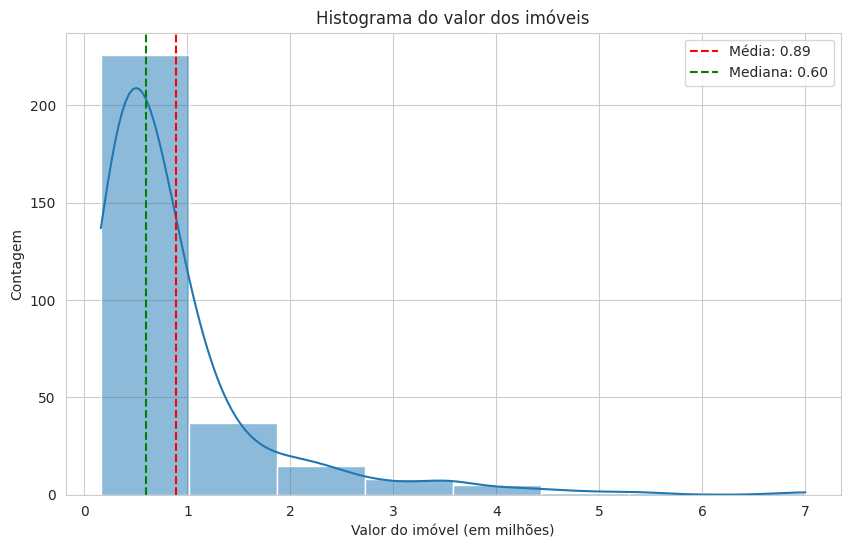

Desvio padrão: 0.90


In [31]:
# Atribui uma nova coluna chamada "valor_milhoes" ao DataFrame df_imoveis
df_imoveis = df_imoveis.assign(valor_milhoes = df_imoveis.valor_imovel / 1000000)

# Configura o estilo do gráfico, define o tamanho da figura e cria um histograma com uma curva de densidade (kde)
# Visualiza a distribuição dos valores da coluna "valor_milhoes" no DataFrame df_imoveis. Divide o histograma em 8 bins.
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=df_imoveis, x="valor_milhoes", kde=True, bins=8)

# Calcula a média, a mediana e o desvio padrão para a variável "valor_milhoes" no DataFrame df_imoveis
media = df_imoveis['valor_milhoes'].mean()
mediana = df_imoveis['valor_milhoes'].median()
desvio_padrao = df_imoveis['valor_milhoes'].std()

# Adiciona linhas verticais no gráfico de histograma para representar a média (em vermelho) e a mediana (em verde) da variável "valor_milhoes"
plt.axvline(x=df_imoveis['valor_milhoes'].mean(), color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.axvline(x=mediana, color='green', linestyle='--', label=f'Mediana: {mediana:.2f}')
plt.legend()

# Adiciona rótulos aos eixos e um título ao gráfico de histograma e define um título para o gráfico
plt.xlabel("Valor do imóvel (em milhões)")
plt.ylabel("Contagem")
plt.title("Histograma do valor dos imóveis")

# Exibe o gráfico de histograma e imprime o valor do desvio padrão da variável "valor_milhoes" com duas casas decimais.
plt.show()
print(f'Desvio padrão: {desvio_padrao:.2f}')

### Boxplot
 Representação gráfica da distribuição de um conjunto de dados. Ele é composto por uma "caixa" retangular e duas "hastes" que se estendem a partir da caixa. O boxplot fornece informações sobre a centralidade, a dispersão e a presença de valores atípicos nos dados.

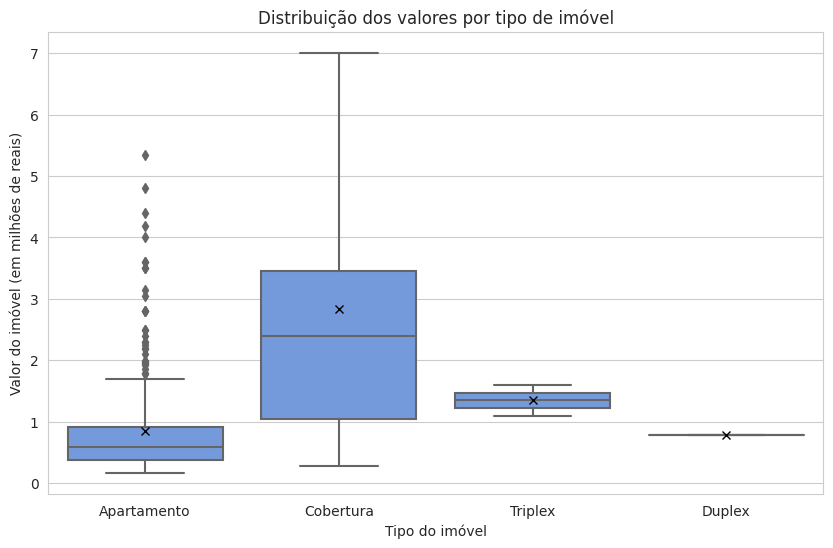

In [32]:
# Configura o estilo do gráfico gerado pelo Seaborn para um fundo com linhas de grade brancas (whitegrid)
sns.set_style('whitegrid')

# Cria um gráfico de boxplot no Seaborn para comparar a distribuição dos valores em milhões de reais ("valor_milhoes") com base na categoria "tipo" no DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(x='tipo', y='valor_milhoes', data=df_imoveis, color='cornflowerblue', showmeans=True, meanprops={"marker":"x", "markerfacecolor":"white", "markeredgecolor":"black"})

# Adiciona rótulos aos eixos e um título ao gráfico de boxplot
plt.xlabel('Tipo do imóvel')
plt.ylabel('Valor do imóvel (em milhões de reais)')
plt.title('Distribuição dos valores por tipo de imóvel')
plt.show()

## Transformações das variáveis categóricas
Consiste em converter variáveis qualitativas (categóricas), como categorias ou rótulos, em um formato numérico ou representação adequada para análise estatística e modelagem. Existem várias técnicas para realizar essa transformação, cada uma com suas vantagens e aplicações específicas.

Referência: https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline.html

In [33]:
# Cria uma lista chamada variaveis_qualitativas que contém os nomes das variáveis qualitativas (categóricas) do DataFrame df_imoveis_catalogo
variaveis_qualitativas = df_imoveis_catalogo[df_imoveis_catalogo['tipo'] == 'qualitativa'].variavel.to_list()
# Cria uma instância do OneHotEncoder da biblioteca scikit-learn e transforma os dados em um formato compatível com pandas
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")

# Utiliza o OneHotEncoder para codificar variáveis qualitativas no DataFrame df_imoveis e armazena o resultado em encoded_columns
encoded_columns = encoder.fit_transform(df_imoveis[variaveis_qualitativas])
encoded_columns

,tipo_Apartamento,tipo_Cobertura,tipo_Duplex,tipo_Triplex,rua_Avenida Aguanambi,rua_Avenida Beira Mar,rua_Avenida Bezerra De Menezes,rua_Avenida Clóvis Matos,rua_Avenida Coronel Miguel Dias,rua_Avenida César Cals,...,bairro_Praia Do Futuro Ii,bairro_Praia Do Futuro ||,bairro_Presidente Kennedy,bairro_Sapiranga,bairro_Serrinha,bairro_São Gerardo,bairro_São João Do Tauape,bairro_Varjota,bairro_Vicente Pinzon,cidade_Fortaleza
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
290,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
291,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
292,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Mudança de escala
É uma técnica essencial na análise de dados e no aprendizado de máquina, usada para garantir que as variáveis estejam na mesma escala e tenham média zero e desvio padrão igual a um. Isso é fundamental para algoritmos sensíveis à escala, como regressão linear e k-means.

A técnica mais comum para isso é a padronização, também conhecida como Standardization, que envolve subtrair a média da variável e dividir pelo desvio padrão. Isso garante que as variáveis estejam em uma escala comparável, facilitando a interpretação e a modelagem dos dados.

A padronização é particularmente útil quando as variáveis têm diferentes unidades de medida ou escalas diferentes. Ela ajuda a evitar que algumas variáveis tenham influência desproporcional sobre os resultados da análise ou do modelo. Portanto, a padronização desempenha um papel fundamental na preparação de dados para análise estatística e modelagem de machine learning.

In [34]:
# Padroniza od dados usando o StandardScaler
scaler = StandardScaler().set_output(transform="pandas")

# Cria uma lista das variáveis quantitativas no DataFrame df_imoveis_catalogo com base na coluna 'tipo'
variaveis_quantitativas = df_imoveis_catalogo[df_imoveis_catalogo['tipo'] == 'quantitativa'].variavel.to_list()

# Normaliza as variáveis quantitativas no DataFrame df_imoveis usando o StandardScaler e armazena os dados padronizados em dados_padronizados
dados_padronizados = scaler.fit_transform(df_imoveis[variaveis_quantitativas])
dados_padronizados

,valor_imovel,valor_condominio,quartos,banheiros,vagas_garagem
0,2.398188,1.267466,0.038123,0.574483,0.966501
1,0.894290,0.373428,0.038123,1.293198,0.966501
2,-0.380632,0.028106,0.038123,0.574483,-0.128494
3,0.508590,-0.129468,0.038123,0.574483,0.419003
4,0.097325,-0.327274,-1.362894,-0.862947,-0.128494
...,...,...,...,...,...
289,-0.213903,1.150123,0.038123,1.293198,-0.128494
290,-0.102750,0.261673,0.038123,0.574483,-0.128494
291,0.619743,1.267466,1.439140,1.293198,-0.128494
292,-0.680745,-0.967629,0.038123,-0.862947,-0.128494


## Feature Selection

A seleção de características (Feature Selection) é um processo crucial na análise de dados e no aprendizado de máquina, destinado a escolher as variáveis mais relevantes para um determinado problema. Isso é importante para evitar a sobrecarga de modelos com características irrelevantes, reduzir a complexidade e melhorar o desempenho.

Existem várias técnicas de seleção de características, como SelectKBest, Recursive Feature Elimination (RFE) e Feature Importance. Essas técnicas avaliam a importância das características com base em métricas como correlação, entropia ou coeficientes de modelo. A escolha da técnica depende da natureza do problema e do tipo de modelo a ser utilizado.

A seleção de características é essencial para aprimorar a precisão do modelo, reduzir o overfitting e economizar recursos computacionais ao lidar com grandes conjuntos de dados. Portanto, é uma etapa crítica na preparação de dados e na construção de modelos de aprendizado de máquina eficazes.

Referência:
https://medium.com/mlearning-ai/feature-selection-techniques-in-machine-learning-82c2123bd548

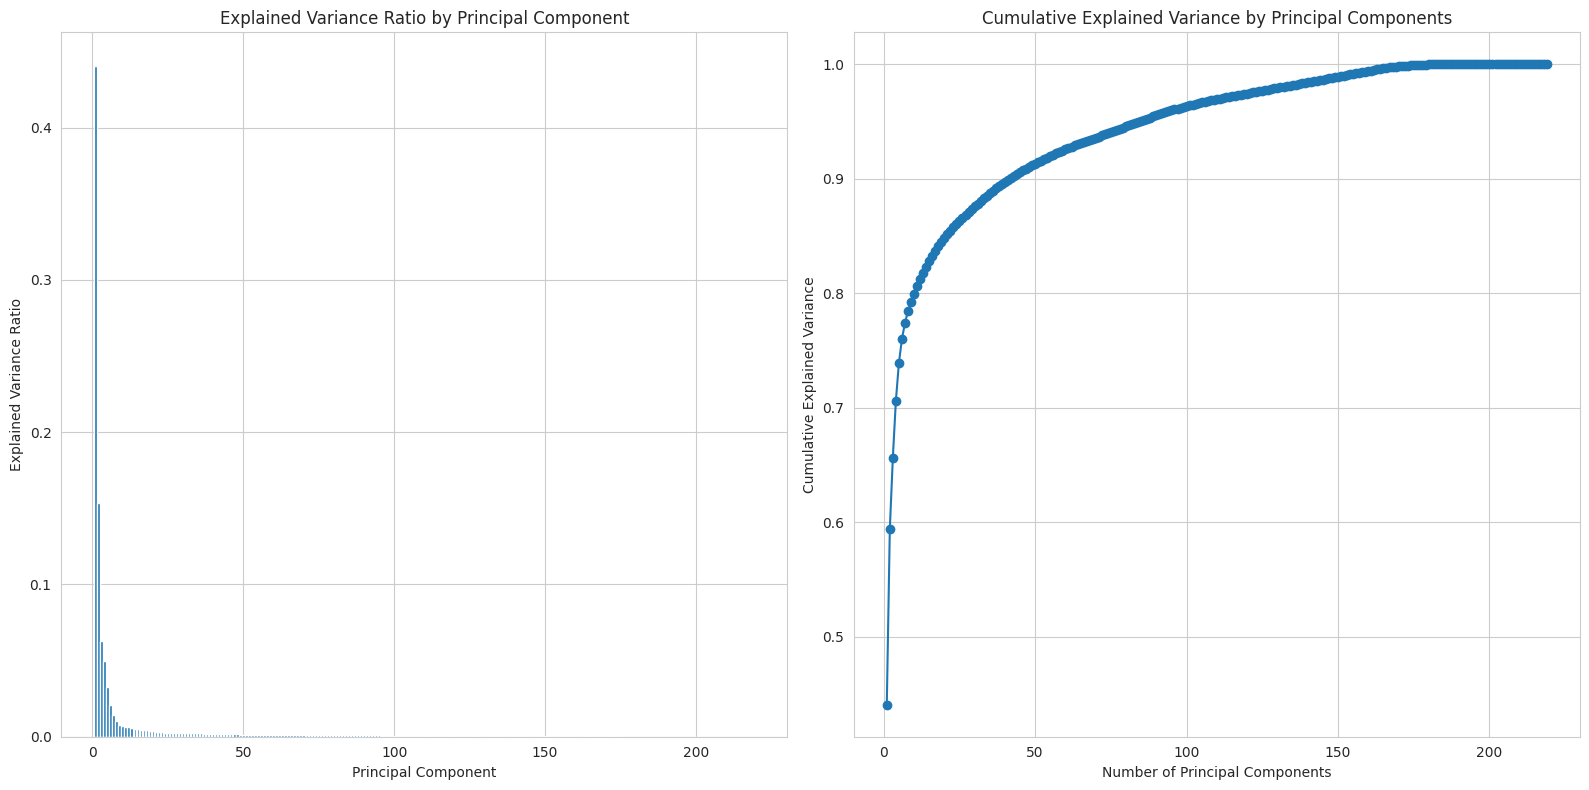

In [35]:
# Importa as bibliotecas necessárias e módulos do Python para realizar uma análise de componentes principais (PCA) em um conjunto de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Combina os DataFrames encoded_columns e dados_padronizados ao longo das colunas
X = pd.concat([encoded_columns, dados_padronizados], axis=1)

# Aplica a Análise de Componentes Principais (PCA) aos dados no DataFrame X e armazena os resultados em X_pca
pca = PCA()
X_pca = pca.fit_transform(X)

# Armazena as proporções da variância explicada por cada componente principal após a PCA
explained_variance_ratio = pca.explained_variance_ratio_

# Cria uma figura com duas subtramas (subplot) lado a lado, organizadas em uma única linha
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Cria um gráfico de barras em ax1 para representar as razões da variância explicada por cada componente principal
# Define rótulos para os eixos x e y e um título para o gráfico.
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
ax1.set_xlabel("Principal Component")
ax1.set_ylabel("Explained Variance Ratio")
ax1.set_title("Explained Variance Ratio by Principal Component")

# Calcula a variância explicada acumulativa a partir das razões de variância explicada em explained_variance_ratio usando a função np.cumsum
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Cria um gráfico de linha em ax2 para representar a variância explicada cumulativa à medida que mais componentes principais são considerados
# Define rótulos para os eixos x e y e um título para o gráfico
ax2.plot(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance,
    marker="o",
)
ax2.set_xlabel("Number of Principal Components")
ax2.set_ylabel("Cumulative Explained Variance")
ax2.set_title("Cumulative Explained Variance by Principal Components")

# Ajusta automaticamente a disposição dos elementos na figura e exibe a figura gerada.
plt.tight_layout()
plt.show()